   **CREDIT RISK CLASSIFICATION WITH MACHINE LEARNING**


![Alt text](Photos\Credit-Risk.jpg)

TABLE OF CONTENTS

***1.Introduction***
Defining the business problem.
Stating the goal and importance.

***2.Data Loading***
Loading the credit risk Modeling dataset using pandas.

***3.Exploratory Data Analysis (EDA)***
Inspecting data shape, types, missing values.
Visualizing distributions, correlations, and relationships.
Analyzing the target variable (Credit risk).

***4.Data Preprocessing***
Handling missing values.
Encoding categorical variables.
Scaling/normalizing features if needed.
Spliting data into train/test sets.

***5.Model Building***
Training classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
Tuning hyperparameters if desired.

***6.Model Evaluation***
Evaluate using accuracy, precision, recall, F1-score, ROC-AUC, confusion matrix.
Compare models.

***7.Insights & Recommendations***
Interpreting the results.
Providing actionable business recommendations.
Conclusion


## 1.INTRODUCTION.
### Project Overview
Why would credit risk assessment be so necessary to a whole finacial industry. Its worth noting that one of the most critical challenges for financial institutions is knowing who to advance a credit to and what type of credit- simply put, a wrong loan to a wrong person is disasater in waiting. 
Granting loans to risky applicants can lead losses, strained liquidity, reduced investor confidence and even eventual shut down as defaulted loans dont only hurt profitability but also the going concern of a business.
This project is aimed at using historical applicant data i.e Employment length, credit history, loan intent, income et al to predict the likelihood of loan default. By identifying high-risk applicants in advance, lenders can make various informed decisions e.g adjusting interest rates , applying risk mitigation strategies that protect capital while also ensuring credit accessibility. The project can be used also to continually check the outstanding loans' performance and be able to mitigate any impending/imminent default that may have developed while the loan is being serviced.

### Project Statement
Loan default can pose a very serious financial risk to lending institutions which ultimately leads to loss of revenue, corrodes liquidity/capital and general reputation. Manual methods of assessing applicant's risk can be biased, time consuming and inconsistent, however by building a machine learning model that leverages historical data to predict creditworthiness by accurately identifying high-risk profils, financial institutions will not only streamline their lending process to minimieze exposure of default but also proactively applying risk management strategies.

### General Objective
To develop a data-driven risk prediction model that will be able to classify loan applicant as either low or high risk, using historical applicant information. The aim of the model will help to enhance decision making in loan approvals, monitoring, improve financial stability as well as supporting fair access to credit.

### Stakeholders
-Commercial Banks,Saccos and Microfinance institutions 

-Loan officers and Underwriter 

-Risk and Compliance 

-Credit bureau Analysts 


## 2. DATA UNDERSTANDING AND LOADING
The dataset in use was obtained from [kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset) and contains credit applicants' information sourced from a financial institution's loan book. Every record represents an individual who applied for a loan, alongside associated demographice, financial and credit history

The key feature decriptions:
- **Person_age**: The age of an individual applying for the loan.
- **Person_income**: Annual income of an individual.
- **Person_home_ownership**: The housing status of applicant i.e own, rent or mortgage.
- **Person_emp_length**: Employment period in years.
- **Loan_intent**: The purpose of the loan.
- **Loan_grade**: The assigned credit quality grade.
- **Loan_amnt**:Total amount of loan applied for.
- **Loan_int_rate**: The interest rate offered on the associated loan.
- **Loan_percent_income**: Loan amount as a percentage of income.
- **cb_person_defaul_on_file**: Historical default of the individual as per multiple records e.g credit bureau records (Example being Metropol in Kenya).
- **cb_person_cred_hist_length**: The length of credit history of the individual in years.
- **loan_status**: This is the target variable indicating loan risk i.e 0 being low risk and 1 being high risk

This historical record of loan applicants thats has behavioural, financial habits and creditworthiness includes both institutional risk metrics and personal attributes which will help in identification of patterns associated with loan default. Morever the insights are fundametal for building predictive models that will support responsible lending and ultimately reduce finacial risk.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression


In [2]:
#loading the data
df = pd.read_csv('credit_risk_dataset.csv')

## 3. EXPLORATORY DATA ANALYSIS (EDA)
Inspect data shape, types, and missing values.

Visualize feature distributions and relationships.

Analyze the target variable (e.g., loan_status).

In [3]:
#Data shape.
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
#understanding the data by getting summary statistics
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
#further understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
#count missing values per column
df.isnull().sum().sort_values(ascending=False)

loan_int_rate                 3116
person_emp_length              895
cb_person_cred_hist_length       0
cb_person_default_on_file        0
loan_percent_income              0
loan_status                      0
loan_amnt                        0
loan_grade                       0
loan_intent                      0
person_home_ownership            0
person_income                    0
person_age                       0
dtype: int64

- **loan_int_rate**: missing values approximately 10%
- **person_emp_length** : 3& missing and may require cleaning

### Cleaning the missing values

1. **loan_int_rate** (3116 missing)

In [7]:
# 1.seperating rows with and without missing values
missing_values = df[df['loan_int_rate'].isnull()].copy()
no_missing_values = df[df['loan_int_rate'].notnull()].copy()

In [8]:
# 2. choosing features to predict from e.g loan grade
le = LabelEncoder()
no_missing_values.loc[:, 'loan_grade_encoded'] = le.fit_transform(no_missing_values['loan_grade'])
missing_values.loc[:, 'loan_grade_encoded'] = le.transform(missing_values['loan_grade'])

In [9]:
# 3. Building a simple regression model to predict the missing values
features = ['loan_grade_encoded', 'loan_amnt', 'person_income']
X = no_missing_values[features]
y = no_missing_values['loan_int_rate']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
# 4. predicting missing loan interest rates values
X_missing = missing_values[features]
predicted_rates = model.predict(X_missing)
df.loc[df['loan_int_rate'].isnull(), 'loan_int_rate'] = predicted_rates


2. **person_emp_length** (895 missing)

In [11]:
# cleaning person_emp_length with median
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)


In [12]:
#checking the data after filling missing values
df.isnull().sum().sort_values(ascending=False)

cb_person_cred_hist_length    0
cb_person_default_on_file     0
loan_percent_income           0
loan_status                   0
loan_int_rate                 0
loan_amnt                     0
loan_grade                    0
loan_intent                   0
person_emp_length             0
person_home_ownership         0
person_income                 0
person_age                    0
dtype: int64

No more missing values

### 1. Target Variable Distribution (loan_status)

In [13]:
print(df['loan_status'].value_counts())

0    25473
1     7108
Name: loan_status, dtype: int64


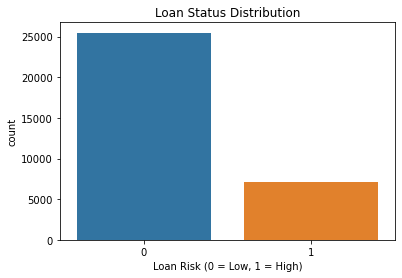

In [14]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Risk (0 = Low, 1 = High)")
plt.ylabel("count")
plt.show()

- There is a clear class imbalance i.e (~22% high risk) and (~78% low risk). We will need SMOTE, class weighting et al during modeling

### 2. Numerical Feature Distribution

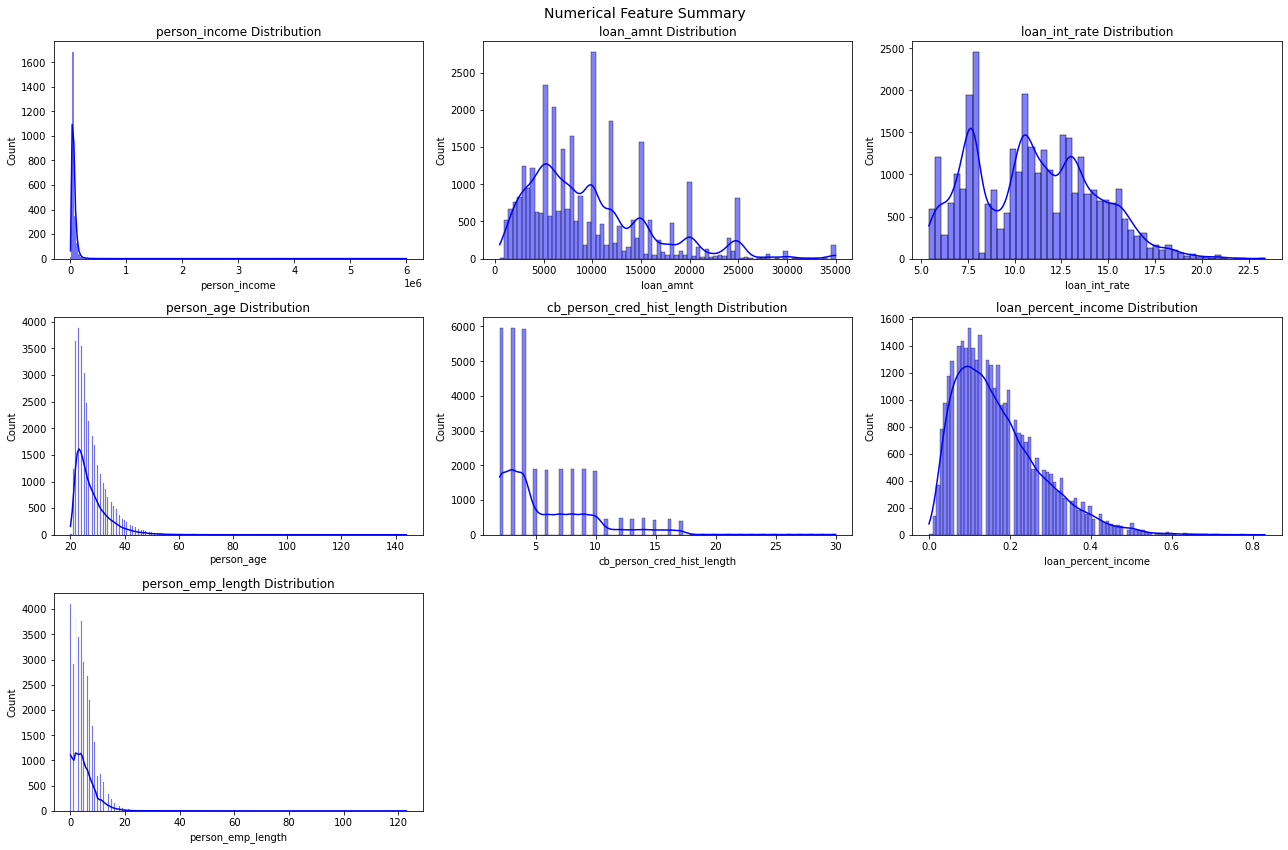

In [15]:
numeral_features = ['person_income', 'loan_amnt', 'loan_int_rate', 'person_age', 
                'cb_person_cred_hist_length', 'loan_percent_income', 'person_emp_length']
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(numeral_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f"{feature} Distribution")
#delete any empty subplots
for j in range(len(numeral_features), len(axes)):
    fig.delaxes(axes[j])
    
plt.suptitle("Numerical Feature Summary", fontsize=14)
plt.tight_layout()
plt.show()


- **person_income** there is a strong right skew with most applicants with relatively modest/higher incomes. We will need to apply log1p transformation to normalize as high-income outliers may have biased predictions or distort the model sensitivity
- **loan_amount** appears standardized and seems  well distributed.
- **loan_int_rate** seems to be clustering around 7.5% -15%, the rates likely tied to credit scoring models-almost forming a bell curve. Higher rates may imply higher perceived risk.
- **person_age** is concentrated between 20-50 with most applicants being younger individuals.
- **cb_person_cred_hist_length** shows signs of skewness with many applicants having short histories. Short histories most likely align with higher risk.
- **loan_percent_income** right skewed with peak around 0.2-0.4. A high ratio might signal repayment pressure which may in turn related positively to a high risk rating.
- **person_emp_length** There is an early peak between 2-5years and thereafter drastically drops of. Generally most applicants have fewer than 20years of employment with a sharp drop off beyond that point and surprisingly few data points stretching beyond 60years  with extremely rare outliers above 100!

### 3. Categorical Feature Distribution.

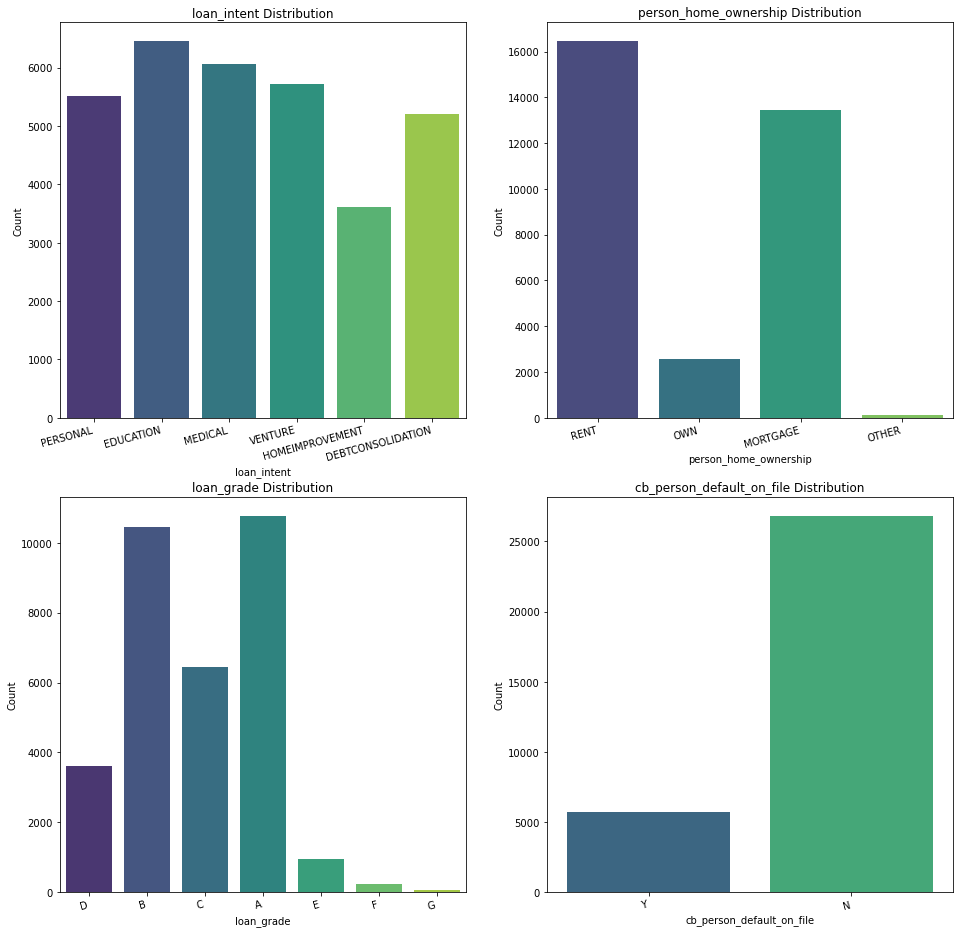

In [16]:
#List of columns with categorical data
categorical_features = ['loan_intent', 'person_home_ownership','loan_grade', 'cb_person_default_on_file']
fig, axes = plt.subplots(2,2, figsize=(16, 16))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i//2, i%2], palette='viridis')
    axes[i//2, i%2].set_title(f"{feature} Distribution")
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].set_ylabel("Count")
# rotate x labels for better readability
    plt.setp(axes[i//2, i%2].xaxis.get_majorticklabels(), rotation=15, ha='right')

- **Loan intent distribution** has Education, medical, personal and Ventue as the most common category. This to a large extent may imply that education loans represent younger, lower income borrowers with less credit history. Medical loans could be urgent or unplanned- this is a potential of financial vulnerability. Venture loans could be mostly linked to more established applicants-could also be business applicants.
- **Home ownership status** has Rent has the dorminant class followed by Mortgage the own. Renting might correlate with lower financial stability or generally the net worth. Mortgage holders could be construed to mean medium credit borrowers and ownership may suggest stronger financial health.
- **Loan grade distribution** has dorminant grades being A,B and C with grades E,F & G are rare and likely tied to higher perceived risk.
- **Default on File** Majority are N, approximately 27,000 have no prior default whereas the Minority(Y), approximately have a recorded default.

### 4. Features vs Target Relationship

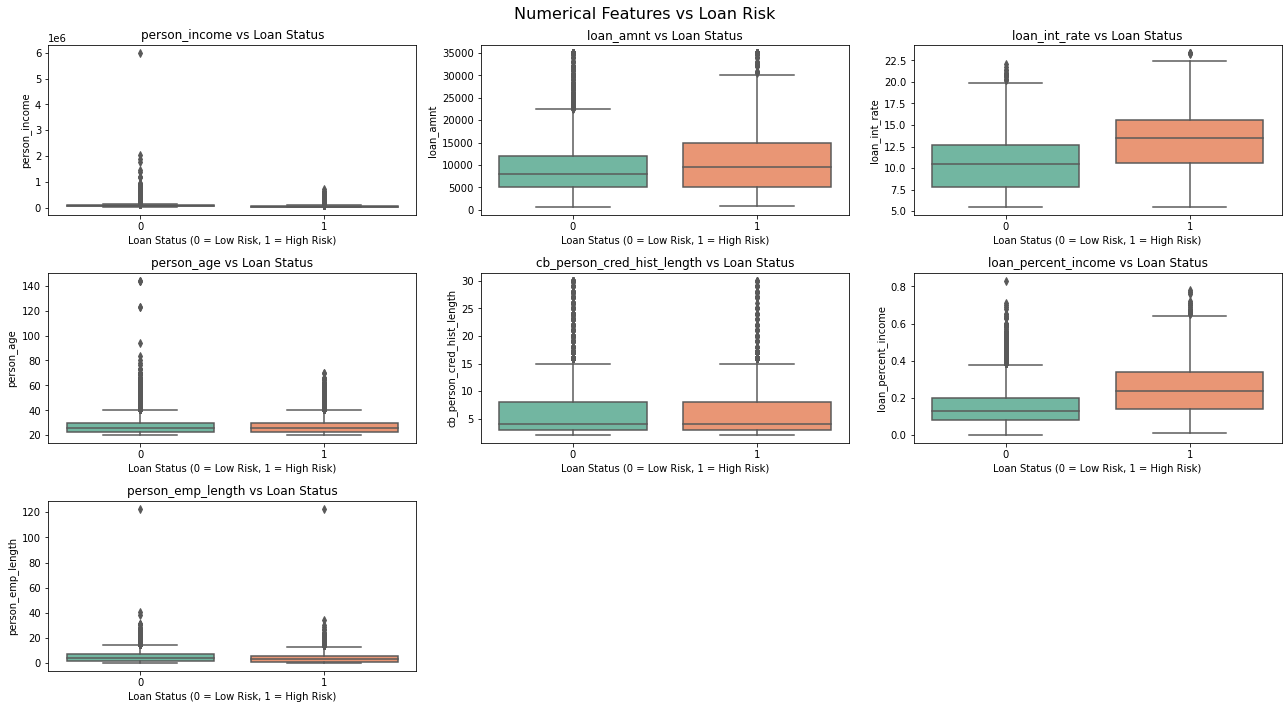

In [17]:
# Define subplot grid size based on number of columns
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

# Create boxplots for each numerical feature vs loan_status
for i, col in enumerate(numeral_features):
    sns.boxplot(x='loan_status', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs Loan Status')
    axes[i].set_xlabel('Loan Status (0 = Low Risk, 1 = High Risk)')
    axes[i].set_ylabel(col)
# Remove empty subplots if any
for j in range(len(numeral_features), len(axes)):
    fig.delaxes(axes[j])

# Clean layout
plt.suptitle("Numerical Features vs Loan Risk", fontsize=16)
plt.tight_layout()
plt.show()


**a. person_income vs Loan Status**
- Both risk groups show wide income ranges and have medians being similar and substantial upper-end outliers
- Personal income may have have limited predictive power isolation. Perhaps more useful in combination with ratios like loan_percent_income

**b. loan_amnt vs Loan Status**
- Surprisingly, high-risk applicants tend to receive larger loan amounts with equally higher median.
- Larger loans tend to indicate riskier lending decisions and could ultimately signal default.

**c. loan_int_rate vs Loan Status**
- High-risk loans show significantly higher interest rates, with a clear separation in the medians.
- Interest rate is likely assigned based on borrower risk. Strong candidate for predictive modeling and risk profiling.

**d. person_age vs Loan Status**
- Age distributions are similar across both loan statuses, with overlapping medians and ranges.
- Age alone may not be a strong predictor. Consider segmenting into age groups or combining with credit history for better signal.

**e. cb_person_cred_hist_length vs Loan Status**
- Both groups have comparable credit history lengths. No dramatic spread or shift between classes.
- Credit history length may not drive default on its own, but could add value when paired with other behavioral features.

**f. loan_percent_income vs Loan Status**
- High-risk applicants have higher loan-to-income ratios, with a noticeably wider spread and higher median.
- Strong indicator of repayment pressure. Highly predictive feature — prioritize in modeling and risk scoring.

**G. person_emp_length vs Loan Status**
- With low-risk group, median emloyment length is higher whereas high-risk group is skewed toward shorter employment lengths-many falling below 5 year mark.Low risk distribution is tighter, showing more consistency and fewer extreme short-tenure cases whereas high-risk group are wide spread with more variability.
- Low-risk suggests applicants with longer, stable employment history are less likely to default whereas High-risk group indicates that borrowers with short unstable employment records may carry greater risk.


### 5. Correlation Matrix

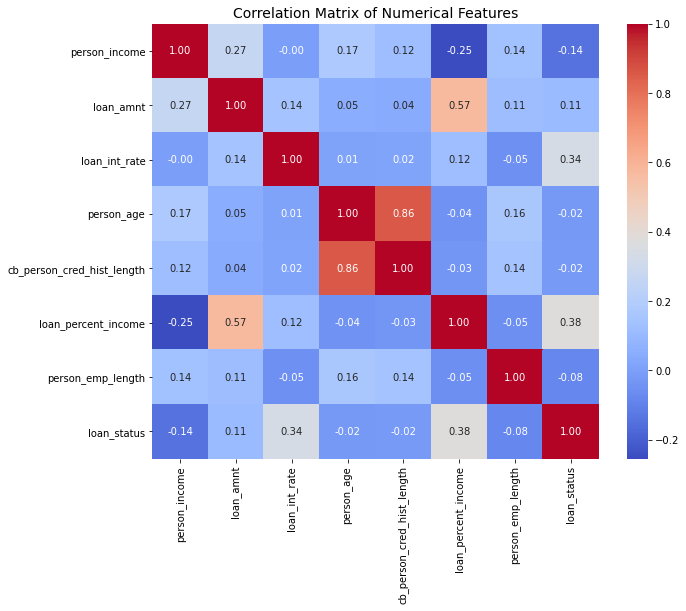

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeral_features + ['loan_status']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()


- **person_age** and **cb_person_cred_hist_length** show strong positive correlation (0.86) with older individuals generally having longer credit histories therefore variables may be conveying the same signal hence should be dropped or combine to reduce redundancy
- **loan_percentage_income** and **loan_int_rate** have a moderate positive correlation with **loan_status** hence this features deserve priority in feature selection and may rank highly in importance scores.
- **loan amount** and **person income** have weak correlation (<0.15) with loan status may not be directly predictive hence need for further exploration. 

## 4. DATA PREPROCESSING
We start by first converting the various insights into machine-readable power

In [19]:
#Final transformation and encoding steps
#1. Apply Transformation
df['log_person_income'] = np.log1p(df['person_income'])  # Normalize skew

#2. Employment Tier (if not yet created)
df['emp_length_category'] = pd.cut(df['person_emp_length'], 
                                   bins=[0, 2, 5, 10, 40], 
                                   labels=['Very Short', 'Short', 'Medium', 'Long'])

#3. Encode Categorical Features
# One-hot encode: loan_intent, person_home_ownership, emp_length_category
df = pd.get_dummies(df, columns=['loan_intent', 'person_home_ownership', 'emp_length_category'], drop_first=True)

#Ordinal encode: loan_grade (A = best, G = worst)
grade_order = [['G', 'F', 'E', 'D', 'C', 'B', 'A']]
ordinal_encoder = OrdinalEncoder(categories=grade_order)
df['loan_grade_encoded'] = ordinal_encoder.fit_transform(df[['loan_grade']])

# Binary encode: cb_person_default_on_file ('Y' = 1, 'N' = 0)
df['default_flag'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

#4. Drop Redundant Feature (e.g. credit history length)
df.drop(columns=['cb_person_cred_hist_length'], inplace=True)
df.drop('cb_person_default_on_file', axis=1, inplace=True)
df.drop('loan_grade', axis=1, inplace=True)


**Train-Test Split**

In [20]:
# Defining the target variable and features
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [21]:
print(X_train.select_dtypes(include='object').columns)


Index([], dtype='object')


**Class Imbalance Handling**

Given the risk split of 78/22- this will balance our training data to avoid overfitting.

In [22]:
#Applying SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X_train, y_train)


## 5. MODELLING AND EVALUATION
For comparison purposes, we will the below models:
 1. **Random Forest**
 2. **Logistic regression**

1. Random Forest Classifier

In [23]:
#Initializing random forest model
rf_model = RandomForestClassifier(random_state=42)

# Fitting the model
rf_model.fit(X_balanced, y_balanced)

# Making predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

#model evaluation
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))


Random Forest Results
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5095
           1       0.92      0.72      0.81      1422

    accuracy                           0.93      6517
   macro avg       0.93      0.85      0.88      6517
weighted avg       0.93      0.93      0.92      6517

ROC AUC Score: 0.9355702275610103


**Feature Importance plot**

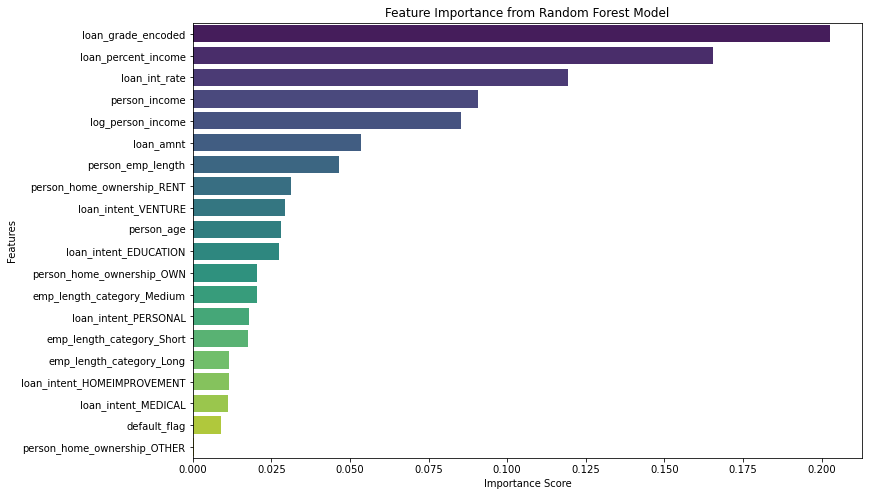

In [24]:
#For easy sorting lets create a feature importance plot
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Our model predominantly trusts how the loan is structured and the income related metrics:
- **loan_grade_encoded** has the strongest signal, indicating that higher loan grades closely translate to creditworthiness
- **loan_percent_income** measures loan burden in relation to income hence a key stress indicator.
- **loan_int_rate** indicates how interest rate strongly mirrors lender risk espectations as higher rates implies riskier applicant.
- **person_income/log_income** after the reduction of skewness there is an enhanced signal.
- **loan_amnt** larger amounts often tends to correlate with higher repayment risk.

**ROC CURVE**

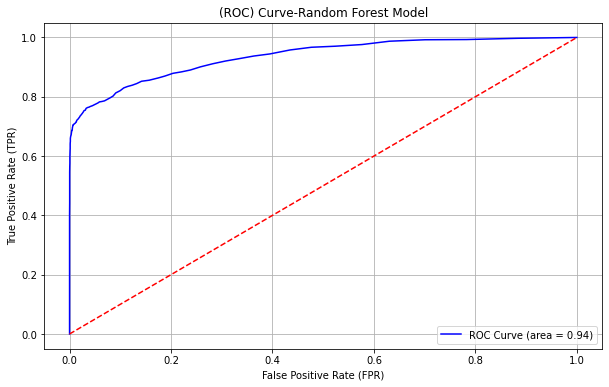

In [25]:
#Predicting probabilities for positive class
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

#calculating FPR, TPR, and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr) 

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('(ROC) Curve-Random Forest Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

- **Precision**: For the applicants the model predicted as low risk, 93% were correctly classified and for those predicted as high risk, 92% were actual defaulters. This high precision is an indication that the model is reliable in risk identification.
- **Recall**: Actual non-defaulters were identified to be 98%-a strong indicator, whereas it captured defaulters to be 72% a big shift from initial iteration. Recall significantly shows that the model is able to successfully flag most credit risks.
- **F1 Score**: Low risk borrowers scored and F1 of 0.95, reflective of consistent and balanced predictions. High risk borrowers had an F1 of 0.81-showing a strong predictive ability. The scores confirm the consistency and quality of model across both outcomes.
- **Overall Accuracy**: Given the real world complexity and somewhat class imbalance, the model achieved an outstanding accuracy of 93%.
- **ROC AUC**:With a score of approximately 94%, the model can confidently and consistently distinguish between safer borrowers and defaulters for strategic operational decision-making. 

2. Logistic Regression Model

In [26]:
#Initializing logistic regression model
log_model = LogisticRegression(random_state=42)

#training the model
log_model.fit(X_balanced, y_balanced)

# Making predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

#model evaluation
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_log))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      5095
           1       0.45      0.75      0.56      1422

    accuracy                           0.74      6517
   macro avg       0.68      0.75      0.69      6517
weighted avg       0.81      0.74      0.76      6517

ROC AUC Score: 0.8194059701121725


**ROC CURVE**

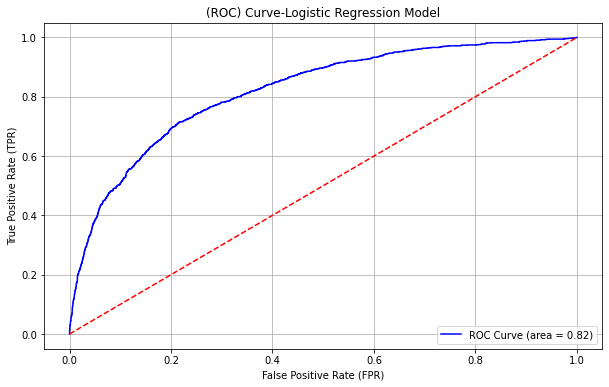

In [27]:
#Plotting the ROC curve
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc_log))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('(ROC) Curve-Logistic Regression Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

- **Precision**: For applicants predicted as low risk, 91% were correctly classified and for those predicted as high risk, 45% were actual defaulters. While Precision is solid on low risk applicants, its lower for high risk ones, indicating over flagging and or false positive.
- **Recall**: Non defaulters and actual defaulters were 74% and 75% correctly identified respectively. Recall significantly shows that the model is able to successfully flag most credit risks, even though precision is fell short.
- **F1 Score**: Low risk borrowers scored and F1 of 0.82, reflective of consistent and balanced predictions. High risk borrowers had an F1 of 0.56-showing an imbalance. The scores suggest a rather moderately useful model.
- **Overall Accuracy**: Achieved an accuracy of 74% which is modest but relatively lower than Random Forest's.
- **ROC AUC**:With a score of approximately 82%, the model has a moderate capability to distinguish safer borrowers from defaulters.

**Model Comparison- Random Forest Model vs Logistic regression Model**

We will proceed to get the summary comparison of Precision, Recall, F1 score, Overall Accuracy and ROC AUC- which we will first visualize both on a single chart.

Combined ROC CURVE

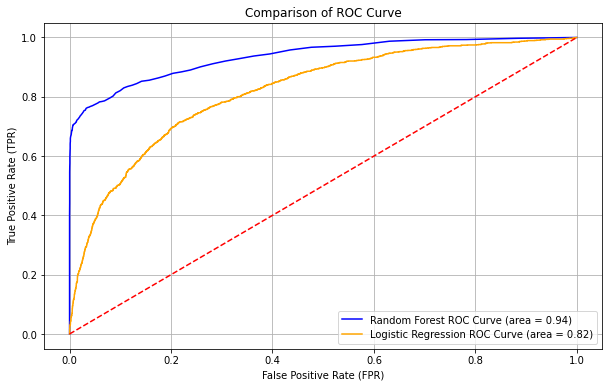

In [29]:
#plotting the combined ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Random Forest ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot(fpr_log, tpr_log, color='orange', label='Logistic Regression ROC Curve (area = {:.2f})'.format(roc_auc_log))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Comparison of ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

SUMMARY COMPARISON OF THE TWO MODELS



| Metric               | Random Forest                         | Logistic Regression                      | Interpretation Summary                                                                 |
|----------------------|----------------------------------------|-------------------------------------------|-----------------------------------------------------------------------------------------|
| **Accuracy**         | 93%                                    | 74%                                        | RF shows high overall correctness; LR is moderately reliable                           |
| **Precision (0)**    | 93% (non-defaulters)                  | 91% (non-defaulters)                      | Both models predict safe borrowers well                                                 |
| **Precision (1)**    | 92% (defaulters)                      | 45% (defaulters)                          | RF is much better at accurately flagging risky borrowers                                |
| **Recall (0)**       | 98%                                    | 74%                                        | RF preserves almost all safe lending opportunities                                      |
| **Recall (1)**       | 72%                                    | 75%                                        | LR slightly outperforms RF in identifying defaulters                                    |
| **F1 Score (0)**     | 0.95                                   | 0.82                                       | RF maintains exceptional consistency for non-defaulters                                 |
| **F1 Score (1)**     | 0.81                                   | 0.56                                       | RF is more balanced for defaulters; LR recall-driven but with weaker precision          |
| **ROC-AUC Score**    | 0.94                                   | 0.82                                       | RF demonstrates stronger separation and confidence in predictions                       |



## 7. INSIGHTS AND RECOMENDATIONS
- **Random Forest Model** clearly demonstrates superior performance across all metrics except Recall for defaulters. It's therefore well suited for deployment in automated risk scoring and credit segmentation environment/needs.
- **Logistic Regression Model** largely excells in recall for defaulters, making it appealing when the goal is to catch risky applicants though it may greatly sacrifice precision leading to a higher false positives.

Recommendations
- **Choose Random Forest** for deployment: With high precision, robust recall and feature transparency, the model is ideal for credit scoring engines which was our main objective.
- **Use Logistic Regression** for regulatory and or audit needs: As it offers fast and interpretable output which valuable in institutions when it comes to compliance and for policy formulation and revies.